In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions_anisotropy import *

### 3C - vertical array elastic tensor inversion

In order to have proper insights into the advantages of 6C-measurements, it's straightforward to compare the feasibility for multiple 3C-sensors in the exact same scenario (borehole, plane waves, homogeneous anisotropic medium).

Arrival time changes from one station in the borehole to the next are due to the geometry a product of slowness and the cosine of the incident angle.

$dt = dx\frac{1}{v}\cos\theta$

This is a uncertainty relationship. From the translational signal we can only derive the polarization. In an anisotropic medium, polarization of P wave and propagation directiona are not necessarily parallel. 

We can determine velocity ratios by comparing the time lag for different phase arrivals.

$\frac{dt_P}{dt_{S1}}=\frac{v_{S1}}{v_P}$

$\frac{dt_P}{dt_{S2}}=\frac{v_{S2}}{v_P}$

$\frac{dt_{S1}}{dt_{S2}}=\frac{v_{S2}}{v_{S1}}$

The perk of having multiple measurements along a line is that the spatial derivative can be determined. 

$\partial_z \dot u_x = \frac{A\omega^2}{v}n_x\cos\theta $

$\partial_z \dot u_y = \frac{A\omega^2}{v}n_y\cos\theta $

$\partial_z \dot u_z = \frac{A\omega^2}{v}n_z\cos\theta $

However, the uncertainty relationship between velocities and inclination appears again. Ratios between derivatives simply yield the polarizations. Ratios between derivatives of different phases yield the ratio velocity ratios. Ratio between derivatives and translational signal gives the $(\cos\theta~/~v)$ relationship once again.

#### What we can't derive

$\theta$. We'd need to know at least one of the velocities.

$\phi$. Best guess is for both angles the polarization of P.

Velocities. We can only determine ratios.

Therefore, we don't know enough to derive the elastic tensor.

#### Other problems

Problems may be caused by inhomogeneities (line-measurement instead of point measurement) and spherical wavefronts.

#### Summary

A single 6C-receiver may outperform an arbitrary amount of 3C-measurements in the same scenario.

#### Remarks

When evaluating this kind of problem, other data is usually available. For example horizontal arrays on the surface (makes it easier to estimate propagation direction) or vertical velocities.

In [2]:
def make_some_noise_3D(seis,SNR_dB_u):
    nt = len(seis[0,:])
    seis_noise = np.zeros((3,nt))
    seis_noise[0:3] = awgn(seis[0:3],SNR_dB_u)
    return seis_noise

In [3]:
medium = load_medium_list()
rmed = load_random_medium_list()

#0 isotropic
#1 taylor sandstone
#2 mesaverde clayshale
#3 mesaverde laminated siltstone
#4 mesaverde mudshale
#5 mesaverde calcareous sandstone
#6 quartz
#7 Baird-shale
 
#0 isotropic
#1 cubic
#2 VTI
#3 tetragonal
#4 trigonal
#5 orthorhombic
#6 monoclinic
#7 triclinic


In [4]:
C, density = get_specific_VTI(medium[1])

taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


In [5]:
def get_seis_3D(v,vel,nu,f,fs,Ns,L):
    dx = np.linspace(0,L,Ns)
    xr0 = max(vel)*5.
    tmin = xr0/(max(vel))*0.8
    tmax = (xr0+L*nu[2])/min(vel) *1.1
    nt = int(((tmax-tmin) * fs)+1)
    t = np.linspace(tmin,tmax,nt)
    seis = np.zeros((Ns,3,nt))
    A = 1.
    omega = 2*np.pi*f
    for i in range(Ns):
        xr = xr0 + dx[i] * nu[2]
        seis[i,0,:] = - v[0,0]*A*omega**2*(t-xr/vel[0])*np.exp(-(f**2)*(t-xr/vel[0])**2) \
                - v[0,1]*A*omega**2*(t-xr/vel[1])*np.exp(-(f**2)*(t-xr/vel[1])**2) \
                - v[0,2]*A*omega**2*(t-xr/vel[2])*np.exp(-(f**2)*(t-xr/vel[2])**2)
        seis[i,1,:] = - v[1,0]*A*omega**2*(t-xr/vel[0])*np.exp(-(f**2)*(t-xr/vel[0])**2) \
                - v[1,1]*A*omega**2*(t-xr/vel[1])*np.exp(-(f**2)*(t-xr/vel[1])**2) \
                - v[1,2]*A*omega**2*(t-xr/vel[2])*np.exp(-(f**2)*(t-xr/vel[2])**2) 
        seis[i,2,:] = - v[2,0]*A*omega**2*(t-xr/vel[0])*np.exp(-(f**2)*(t-xr/vel[0])**2) \
                - v[2,1]*A*omega**2*(t-xr/vel[1])*np.exp(-(f**2)*(t-xr/vel[1])**2) \
                - v[2,2]*A*omega**2*(t-xr/vel[2])*np.exp(-(f**2)*(t-xr/vel[2])**2) 
    return seis, t

x 1
y 1
z 1


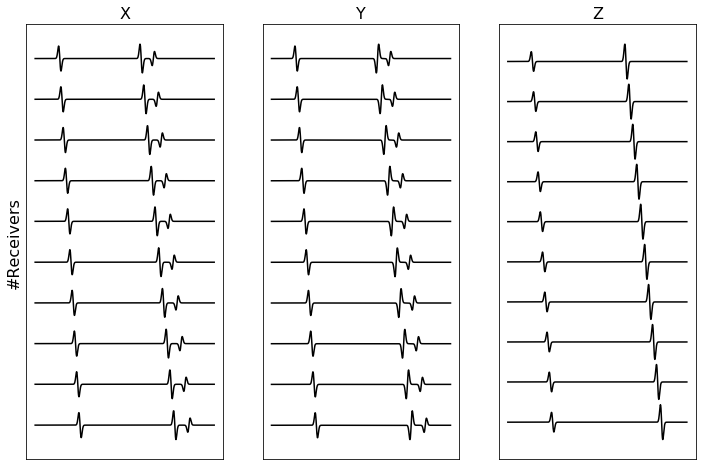

In [6]:
f = 15. #Hz
fs = 100. #Hz
Ns = 10
L = 5000 #m
nus,gammas = get_direction('input',C,1)
vel,v = get_eigenvals(gammas[0], density)
seis,t = get_seis_3D(v,vel,nus[0],f,fs,Ns,L)
fix,ax = plt.subplots(ncols=3,figsize=(12,8))
for j in range(Ns):
    for i in range(3):
        a0 = np.max(np.sqrt(seis[j,0,:]**2+seis[j,1,:]**2+seis[j,2,:]**2))
        ax[i].plot(t,seis[j,i,:]-j*a0*2,c='k')
        ax[i].set_yticks([])
        ax[i].set_xticks([])
ax[0].set_title('X',fontsize=16)
ax[1].set_title('Y',fontsize=16)
ax[2].set_title('Z',fontsize=16)
ax[0].set_ylabel('#Receivers',fontsize=16)
#plt.savefig('3DseisInversion/boreholemeasurement.png')
plt.show()    


In [7]:
def get_vertical_strain(seis,t,Ns,L):
    nt = len(t)
    velo = np.zeros((Ns,nt))
    dt = (t[-1]-t[0])/nt
    for i in range(Ns):
        integral = 0.
        for it in range(nt):
            integral += seis[i,2,it]
            velo[i,it] = dt * integral 
    
    strain = np.zeros((Ns,nt))
    dx = L/Ns
    strain[0,:] = (velo[1,:]-velo[0,:])/dx
    for i in range(1,Ns-1):
        strain[i,:] = (velo[i+1,:]-velo[i-1,:])/(2*dx)
    strain[Ns-1,:] = (velo[Ns-1,:]-velo[Ns-2,:])/dx    
    
    return strain
                

x 1
y 1
z 1


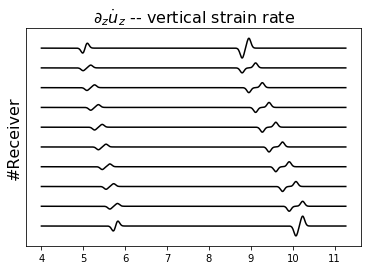

In [8]:
f = 15. #Hz
fs = 100. #Hz
Ns = 10
L = 5000 #m
N = 1
nus,gammas = get_direction('input',C,N)
for i in range(N):
    vel,v = get_eigenvals(gammas[i], density)
    seis,t = get_seis_3D(v,vel,nus[i],f,fs,Ns,L)
    strain = get_vertical_strain(seis,t,Ns,L)
    for j in range(0,Ns):
        a0 = np.max(strain)
        plt.plot(t,strain[j]-2*j*a0,c='k')
    plt.yticks([])   
    plt.title('$\partial_z \dot u_z$ -- vertical strain rate',fontsize=16)
    plt.ylabel('#Receiver',fontsize=16)
    plt.show()   

### Estimate velocity ratios by comparing time differences

In [9]:
C, density = get_specific_VTI(medium[1])

taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


x 1
y 1
z 1


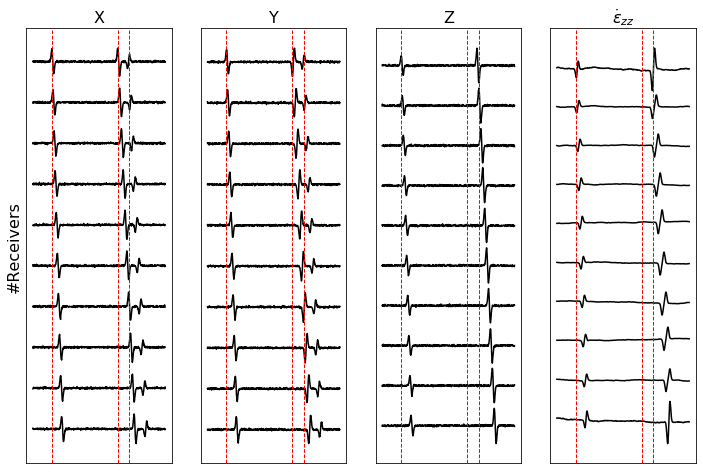

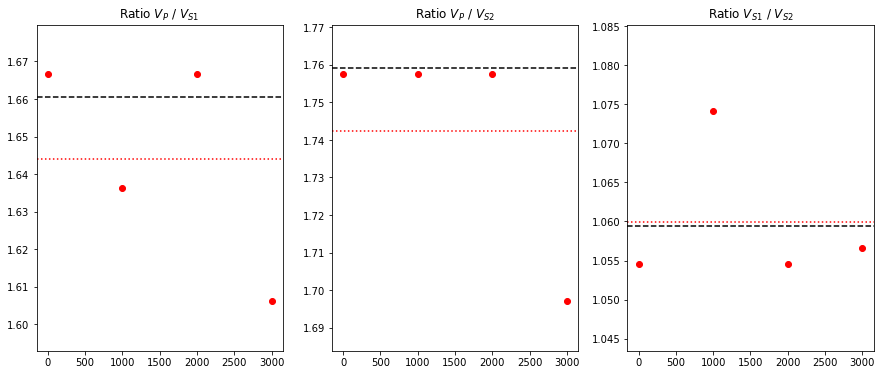

Assuming polarization of P is parallel to propagation direction:
Velocity estimation error [%]:
P-wave: 23.0
S1-wave: 23.0
S2-wave: 23.0


In [10]:
f = 15. #Hz
fs = 100. #Hz
Ns = 10
L = 3000 #m
N = 1
hw = 3
SNR_dB_u = 15.
nus,gammas = get_direction('input',C,N)
for i in range(N):
    vel,v = get_eigenvals(gammas[i], density)
    seis,t = get_seis_3D(v,vel,nus[i],f,fs,Ns,L)
    for j in range(Ns):
        seis[j] = make_some_noise_3D(seis[j],SNR_dB_u)
    nt = len(t)
    npols = np.zeros((Ns,3,3))
    arrivals = np.zeros((Ns,3))
    for j in range(Ns):
        npols[j,:,:] = get_polarizations(seis[j],'nav')
        arrivals[j,:] = pick_arrivals_3D(seis[j],f,fs)   
            
    strain = get_vertical_strain(seis,t,Ns,L)    
    fix,ax = plt.subplots(ncols=4,figsize=(12,8),sharex=True)
    a0 = np.max(np.sqrt(seis[0,0,:]**2+seis[0,1,:]**2+seis[0,2,:]**2))
    a1 = np.max(strain[0,:])
    for j in range(Ns):
        for k in range(3):
            ax[k].plot(t,seis[j,k,:]-j*a0*2,c='k')
           
        ax[3].plot(t,strain[j]-2*a1*j,c='k')
    for k in range(4):
        ax[k].set_yticks([])    
    ax[0].set_title('X',fontsize=16)
    ax[1].set_title('Y',fontsize=16)
    ax[2].set_title('Z',fontsize=16)
    ax[3].set_title('$\dot\epsilon_{zz}$',fontsize=16)
    ax[0].set_ylabel('#Receivers',fontsize=16)
    for k in range(4):
        ax[k].set_xticks([])
        for l in range(3):
            ax[k].axvline(t[int(arrivals[0,l])],c='r',ls='dashed',lw=1)   
#    plt.savefig('3DseisInversion/boreholemeasurementstrain.png')
    plt.show()
    
    ratio_p_s1 = np.zeros(Ns-2*hw)
    ratio_p_s2 = np.zeros(Ns-2*hw)
    ratio_s1_s2 = np.zeros(Ns-2*hw)
    dtp = np.zeros((Ns-2*hw))
    dts1 = np.zeros((Ns-2*hw))
    dts2 = np.zeros((Ns-2*hw))
    for j in range(hw,Ns-hw):
        dtp[j-hw] = t[int(arrivals[j+hw,0])]-t[int(arrivals[j-hw,0])]
        dts1[j-hw] = t[int(arrivals[j+hw,1])]-t[int(arrivals[j-hw,1])]
        dts2[j-hw] = t[int(arrivals[j+hw,2])]-t[int(arrivals[j-hw,2])]
        if dtp[j-hw]!=0 and dts1[j-hw]!=0:
            ratio_p_s1[j-hw] = dts1[j-hw]/dtp[j-hw]
        else:
            ratio_p_s1[j-hw] = np.nan      
        if dtp[j-hw]!=0 and dts2[j-hw]!=0:   
            ratio_p_s2[j-hw] = dts2[j-hw]/dtp[j-hw]
        else:  
            ratio_p_s2[j-hw] = np.nan
            
        if dts1[j-hw]!=0 and dts2[j-hw]:    
            ratio_s1_s2[j-hw] = dts2[j-hw]/dts1[j-hw]
        else:
            ratio_s1_s2[j-hw] = np.nan
    
    
     
    
    fig, ax = plt.subplots(ncols=3,figsize=(15,6))
    ax[0].set_title('Ratio $V_P ~/~ V_{S1} $')
    ax[0].scatter(np.linspace(0,L,Ns-2*hw),abs(ratio_p_s1),c='r')
    ax[0].axhline(max(vel)/np.median(vel),c='k',ls='dashed')
    ax[0].axhline(np.nanmean(abs(ratio_p_s1)),c='r',ls='dotted')
    
    ax[1].set_title('Ratio $V_P ~/~ V_{S2} $')
    ax[1].scatter(np.linspace(0,L,Ns-2*hw),abs(ratio_p_s2),c='r')
    ax[1].axhline(max(vel)/min(vel),c='k',ls='dashed')
    ax[1].axhline(np.nanmean(abs(ratio_p_s2)),c='r',ls='dotted')
    
    ax[2].set_title('Ratio $V_{S1} ~/~ V_{S2} $')
    ax[2].scatter(np.linspace(0,L,Ns-2*hw),abs(ratio_s1_s2),c='r')
    ax[2].axhline(np.median(vel)/np.min(vel),c='k',ls='dashed')
    ax[2].axhline(np.nanmean(abs(ratio_s1_s2)),c='r',ls='dotted')
    plt.show()
    
    print('Assuming polarization of P is parallel to propagation direction:')
    
    dx = 2 * hw * L/Ns
    vp = np.zeros(Ns-2*hw)
    for j in range(0,Ns-2*hw):
        if dtp[j]!= 0 and dtp[j]!=np.nan:
            vp[j] = dx / dtp[j] * abs(npols[j+hw,0,2])
        else:
            vp[j] = np.nan
            
    vp = np.nanmean(vp)
    vs1 = vp / np.nanmean(abs(ratio_p_s1))
    vs2 = vp / np.nanmean(abs(ratio_p_s2))
    print('Velocity estimation error [%]:')
    print('P-wave:',round(abs(vp-max(vel))/max(vel)*100))
    print('S1-wave:',round(abs(vs1-np.median(vel))/np.median(vel)*100))
    print('S2-wave:',round(abs(vs2-min(vel))/min(vel)*100))
    

### Estimate elastic tensor 

In [11]:
C, density = get_specific_VTI(medium[1])

ang1 = 40.
ang2 = 20.
ang3 = -10.

C = rotate_C(C,1,ang1)
C = rotate_C(C,2,ang2)
C = rotate_C(C,3,ang3)

taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


In [12]:
f = 20. #Hz
fs = 250. #Hz
Ns = 50
L = 500 #m
N = 10
hw = 20
SNR_dB_u = 20.
nus,gammas = get_direction('random',C,N)

d = np.array([])
G = np.array([])


for i in range(N):
    vel,v = get_eigenvals(gammas[i], density)
    seis,t = get_seis_3D(v,vel,nus[i],f,fs,Ns,L)
    for j in range(Ns):
        seis[j] = make_some_noise_3D(seis[j],SNR_dB_u)
    nt = len(t)
    npols = np.zeros((Ns,3,3))
    arrivals = np.zeros((Ns,3))
    for j in range(Ns):
        npols[j,:,:] = get_polarizations(seis[j],'nav')
        arrivals[j,:] = pick_arrivals_3D(seis[j],f,fs)   
            
    strain = get_vertical_strain(seis,t,Ns,L)    
    ratio_p_s1 = np.zeros(Ns-2*hw)
    ratio_p_s2 = np.zeros(Ns-2*hw)
    ratio_s1_s2 = np.zeros(Ns-2*hw)
    dtp = np.zeros((Ns-2*hw))
    dts1 = np.zeros((Ns-2*hw))
    dts2 = np.zeros((Ns-2*hw))
    for j in range(hw,Ns-hw):
        dtp[j-hw] = t[int(arrivals[j+hw,0])]-t[int(arrivals[j-hw,0])]
        dts1[j-hw] = t[int(arrivals[j+hw,1])]-t[int(arrivals[j-hw,1])]
        dts2[j-hw] = t[int(arrivals[j+hw,2])]-t[int(arrivals[j-hw,2])]
        if dtp[j-hw]!=0 and dts1[j-hw]!=0:
            ratio_p_s1[j-hw] = dts1[j-hw]/dtp[j-hw]
        else:
            ratio_p_s1[j-hw] = np.nan      
        if dtp[j-hw]!=0 and dts2[j-hw]!=0:   
            ratio_p_s2[j-hw] = dts2[j-hw]/dtp[j-hw]
        else:  
            ratio_p_s2[j-hw] = np.nan
            
        if dts1[j-hw]!=0 and dts2[j-hw]:    
            ratio_s1_s2[j-hw] = dts2[j-hw]/dts1[j-hw]
        else:
            ratio_s1_s2[j-hw] = np.nan
    
    print('Assuming polarization of P is parallel to propagation direction:')
    
    dx = 2 * hw * L/Ns
    vp = np.zeros(Ns-2*hw)
    for j in range(0,Ns-2*hw):
        if dtp[j]!= 0 and dtp[j]!=np.nan:
            vp[j] = dx / dtp[j] * abs(npols[j+hw,0,2])
        else:
            vp[j] = np.nan
            
    vp = np.nanmean(vp)
    vs1 = vp / np.nanmean(abs(ratio_p_s1))
    vs2 = vp / np.nanmean(abs(ratio_p_s2))
    vel_e = [vp,vs1,vs2]
    print(i+1,'Velocity estimation error [%]:')
    print('P-wave:',round(abs(vp-max(vel))/max(vel)*100))
    print('S1-wave:',round(abs(vs1-np.median(vel))/np.median(vel)*100))
    print('S2-wave:',round(abs(vs2-min(vel))/min(vel)*100))
    
    d,G = add_new_data('triclinic',d,G,npols[1,0,:],vel_e,npols[1,:,:],density)

Q = np.linalg.inv(np.dot(G.transpose(),G)) 
m = np.dot(np.dot(Q,G.transpose()),d)
C_e = sort_elastic_coeff('triclinic',m)

param = ['C11','C22','C33','C12','C13','C23','C44','C55','C66','C45','C46','C56','C14','C15','C16','C24',\
         'C25','C26','C34','C35','C36']
c_true = np.array([C[0,0],C[1,1],C[2,2],C[0,1],C[0,2],C[1,2],C[3,3],C[4,4],C[5,5],C[3,4],C[3,5],C[4,5],C[0,3],C[0,4],\
          C[0,5],C[1,3],C[1,4],C[1,5],C[2,3],C[2,4],C[2,5]])
c_est = np.array([C_e[0,0],C_e[1,1],C_e[2,2],C_e[0,1],C_e[0,2],C_e[1,2],C_e[3,3],C_e[4,4],C_e[5,5],C_e[3,4],\
         C_e[3,5],C_e[4,5],C_e[0,3],C_e[0,4],C_e[0,5],C_e[1,3],C_e[1,4],C_e[1,5],C_e[2,3],C_e[2,4],\
         C_e[2,5]])

Assuming polarization of P is parallel to propagation direction:
1 Velocity estimation error [%]:
P-wave: 18.0
S1-wave: 19.0
S2-wave: 15.0
Assuming polarization of P is parallel to propagation direction:
2 Velocity estimation error [%]:
P-wave: 21.0
S1-wave: 26.0
S2-wave: 24.0
Assuming polarization of P is parallel to propagation direction:
3 Velocity estimation error [%]:
P-wave: 15.0
S1-wave: 16.0
S2-wave: 18.0
Assuming polarization of P is parallel to propagation direction:
4 Velocity estimation error [%]:
P-wave: 6.0
S1-wave: 5.0
S2-wave: 5.0
Assuming polarization of P is parallel to propagation direction:
5 Velocity estimation error [%]:
P-wave: 10.0
S1-wave: 13.0
S2-wave: 12.0
Assuming polarization of P is parallel to propagation direction:
6 Velocity estimation error [%]:
P-wave: 5.0
S1-wave: 7.0
S2-wave: 5.0
Assuming polarization of P is parallel to propagation direction:
7 Velocity estimation error [%]:
P-wave: 66.0
S1-wave: 67.0
S2-wave: 68.0
Assuming polarization of P is par

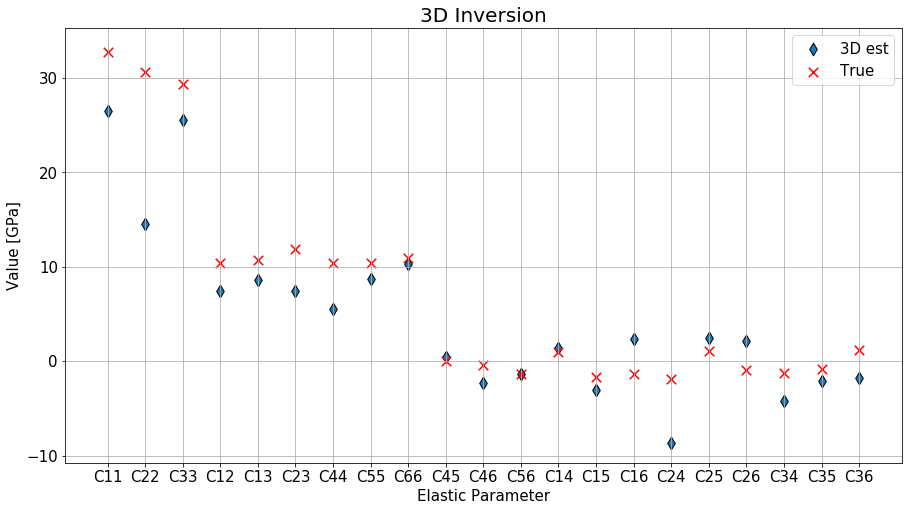

In [13]:
plt.figure(figsize=(15,8))
plt.title('3D Inversion',fontsize=20)
plt.scatter(param,c_est*1e-9,label='3D est',marker='d',s=80,edgecolors='black')
plt.scatter(param,c_true*1e-9,color='red',marker='x',label='True',s=90,edgecolors='black')
plt.grid()
plt.legend(loc=1,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Value [GPa]',fontsize=15)
plt.xlabel('Elastic Parameter',fontsize=15)
plt.show()

### Repeating inversion scheme multiple times

May take a while.

In [14]:
C, density = get_specific_VTI(medium[1])
ang1 = 20.
ang2 = -10.
ang3 = 0.

C = rotate_C(C,1,ang1)
C = rotate_C(C,2,ang2)
C = rotate_C(C,3,ang3)
#C, density = get_random_C(rmed[7],20)

taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


In [15]:
f = 20. #Hz
fs = 250. #Hz
Ns = 50
L = 5000 #m
N = 20
Ninv = 25 
hw = 20
SNR_dB_u = 20.

d = np.array([])
G = np.array([])

C_e = np.zeros((Ninv,6,6))

for inv in range(Ninv):
    nus,gammas = get_direction('random',C,N)
    for i in range(N):
        vel,v = get_eigenvals(gammas[i], density)
        seis,t = get_seis_3D(v,vel,nus[i],f,fs,Ns,L)
        for j in range(Ns):
            seis[j] = make_some_noise_3D(seis[j],SNR_dB_u)
        nt = len(t)
        npols = np.zeros((Ns,3,3))
        arrivals = np.zeros((Ns,3))
        for j in range(Ns):
            npols[j,:,:] = get_polarizations(seis[j],'nav')
            arrivals[j,:] = pick_arrivals_3D(seis[j],f,fs)   

        strain = get_vertical_strain(seis,t,Ns,L)    
        ratio_p_s1 = np.zeros(Ns-2*hw)
        ratio_p_s2 = np.zeros(Ns-2*hw)
        ratio_s1_s2 = np.zeros(Ns-2*hw)
        dtp = np.zeros((Ns-2*hw))
        dts1 = np.zeros((Ns-2*hw))
        dts2 = np.zeros((Ns-2*hw))
        for j in range(hw,Ns-hw):
            dtp[j-hw] = t[int(arrivals[j+hw,0])]-t[int(arrivals[j-hw,0])]
            dts1[j-hw] = t[int(arrivals[j+hw,1])]-t[int(arrivals[j-hw,1])]
            dts2[j-hw] = t[int(arrivals[j+hw,2])]-t[int(arrivals[j-hw,2])]
            if dtp[j-hw]!=0 and dts1[j-hw]!=0:
                ratio_p_s1[j-hw] = dts1[j-hw]/dtp[j-hw]
            else:
                ratio_p_s1[j-hw] = np.nan      
            if dtp[j-hw]!=0 and dts2[j-hw]!=0:   
                ratio_p_s2[j-hw] = dts2[j-hw]/dtp[j-hw]
            else:  
                ratio_p_s2[j-hw] = np.nan

            if dts1[j-hw]!=0 and dts2[j-hw]:    
                ratio_s1_s2[j-hw] = dts2[j-hw]/dts1[j-hw]
            else:
                ratio_s1_s2[j-hw] = np.nan

        dx = 2 * hw * L/Ns
        vp = np.zeros(Ns-2*hw)
        for j in range(0,Ns-2*hw):
            if dtp[j]!= 0 and dtp[j]!=np.nan:
                vp[j] = dx / dtp[j] * abs(npols[j+hw,0,2])
            else:
                vp[j] = np.nan

        vp = np.nanmean(vp)
        vs1 = vp / np.nanmean(abs(ratio_p_s1))
        vs2 = vp / np.nanmean(abs(ratio_p_s2))
        vel_e = [vp,vs1,vs2]
        if vel_e[0]>vel_e[1] and vel_e[0]/3<vel_e[1]:
            d,G = add_new_data('triclinic',d,G,npols[hw,0,:],vel_e,npols[hw,:,:],density)
            
    print(inv+1)
    Q = np.linalg.inv(np.dot(G.transpose(),G)) 
    m = np.dot(np.dot(Q,G.transpose()),d)
    C_e[inv,:,:] = sort_elastic_coeff('triclinic',m)
    if np.sum(C_e[inv,:,:]**2)*1e-18>1e5:
            print('index '+str(k)+' failed')
            C_e[inv,:,:] = np.zeros((6,6))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


Length of borehole [m]:  5000
Number of stations:      50
Comparison distance [m]: 4000.0
SNR [dB]:                20.0
Number of Inversions:    25
Number of events:        20
0 estimates stripped


C:\Users\sebi\Anaconda3\envs\obspy\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


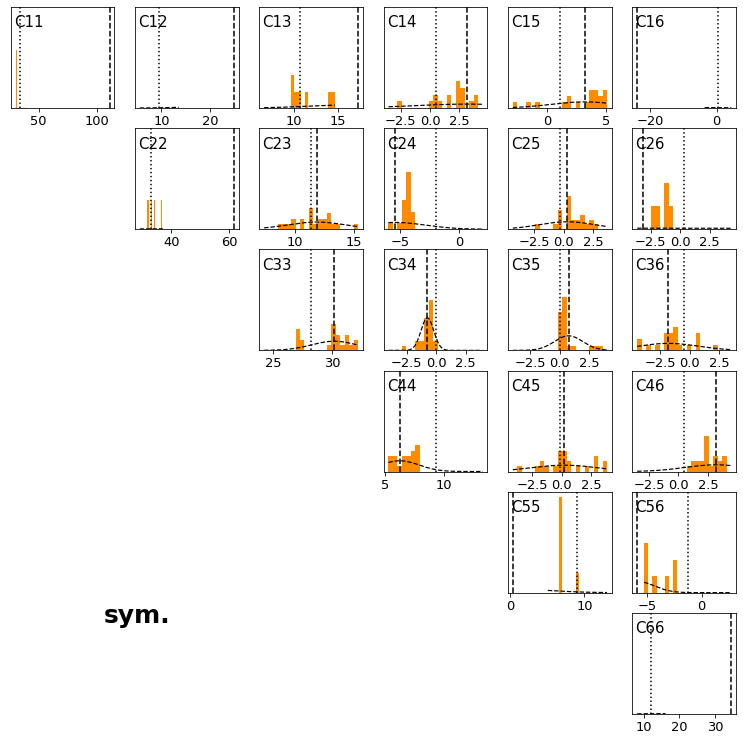

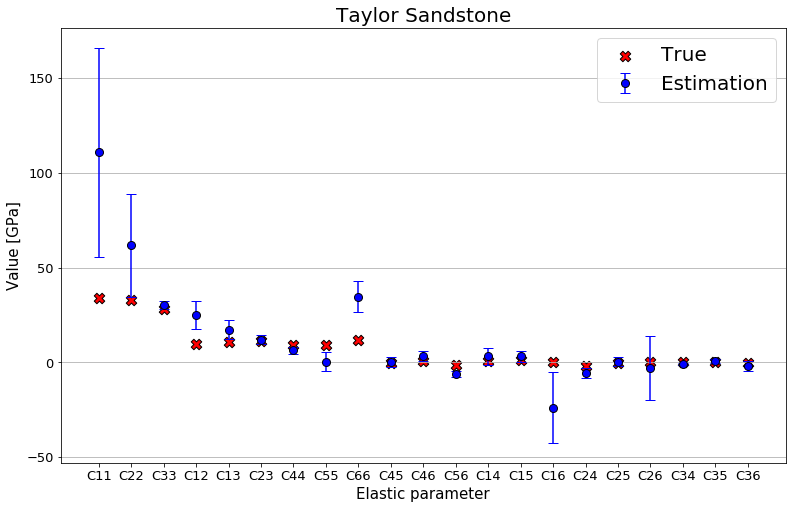

In [16]:
print('Length of borehole [m]: ', L)
print('Number of stations:     ', Ns)
print('Comparison distance [m]:', dx)
print('SNR [dB]:               ', SNR_dB_u)
print('Number of Inversions:   ', Ninv)
print('Number of events:       ', N)
triangularplot(C,C_e,21,4,Ninv,True,savename='Taylor_Sandstone_3C_inversion_isotropic')